# Predicting Heart disease using Machine Learning

<ol>
    <li><b>age:</b> displays the age of the individual.</li>
    <li><b>sex:</b> displays the gender of the individual using the following format :
    <ul>
        <li>1 = male</li>
        <li>0 = female</li>
        </ul></li>
    <li><b>cp (Chest-Pain Type):</b> displays the type of chest-pain experienced by the individual using the following format :
    <ul>
         <li>0 = typical angina</li>
         <li>1 = atypical angina</li>
         <li>2= non — anginal pain</li>
         <li>3 = asymptotic</li>
    </ul></li>
    <li><b>trestbps(Resting Blood Pressure):</b> displays the resting blood pressure value of an individual in mmHg (unit)</li>
    <li><b>chol(Serum Cholestrol):</b> displays the serum cholesterol in mg/dl (unit)</li>
    <li><b>fbs (Fasting Blood Sugar):</b> compares the fasting blood sugar value of an individual with 120mg/dl.
        <ul><li>If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false)</li></ul></li>
    <li><b>restecg (Resting ECG):</b> displays resting electrocardiographic results
    <ul>
        <li>0 = normal</li>
        <li>1 = having ST-T wave abnormality</li>
        <li>2 = left ventricular hyperthrophy</li>
    </ul>
        </li>
    <li><b>thalach(Max Heart Rate Achieved):</b> displays the max heart rate achieved by an individual.</li>
    <li><b>exang (Exercise induced angina):</b><ul>
        <li>1 = yes</li>
        <li>0 = no</li>
        </ul>
    </li>
    <li><b>oldpeak (ST depression induced by exercise relative to rest):</b> displays the value which is an integer or float.</li>
    <li><b>slope (Peak exercise ST segment) :</b>
        <ul><li>0 = upsloping</li>
            <li>1 = flat</li>
            <li>2 = downsloping</li></ul></li>
    <li><b>ca (Number of major vessels (0–3) colored by flourosopy):</b> displays the value as integer or float.</li>
<li><b>thal :</b> displays the thalassemia (is an inherited blood disorder that causes your body to have less hemoglobin than normal) :
    <ul>
        <li>
            0 = normal</li>
        <li>1 = fixed defect</li>
        <li>2 = reversible defect</li></ul></li>
<li><b>target (Diagnosis of heart disease):</b> Displays whether the individual is suffering from heart disease or not :
    <ul><li>0 = absence</li>
        <li>1 = present.</li></ul></li></ol>


In [1]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#We want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.metrics import roc_curve,plot_roc_curve


#Pandas-Profiling helps to build a widget that can be used to better visualise it
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, mean_absolute_error , mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score
 
%matplotlib inline

### Importing the dataset

In [2]:
df=pd.read_csv('heart.csv')

### Shape of the dataset (Rows, Columns)

In [3]:
df.shape

(1025, 14)

### Head of the dataset

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

<br><br>
# Exploratory Data analysis
<br>

### Renaming columns

In [5]:
df.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','slope':'ST_slope','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_disease'}, inplace = True)

In [6]:
# View of the Renamed Dataframe
df.head()

Age  Sex  Chest_pain  Resting_blood_pressure  Cholesterol  \
0   52    1           0                     125          212   
1   53    1           0                     140          203   
2   70    1           0                     145          174   
3   61    1           0                     148          203   
4   62    0           0                     138          294   

   Fasting_blood_sugar  ECG_results  Maximum_heart_rate  \
0                    0            1                 168   
1                    1            0                 155   
2                    0            1                 125   
3                    0            1                 161   
4                    1            1                 106   

   Exercise_induced_angina  ST_depression  ST_slope  Major_vessels  \
0                        0            1.0         2              2   
1                        1            3.1         0              0   
2                        1            2.6         0              0   
3                        0            0.0         2              1   
4                        0            1.9         1              3   

   Thalassemia_types  Heart_disease  
0                  3              0  
1                  3              0  
2                  3              0  
3                  3              0  
4                  2              0

### Information about the data

In [7]:
df1 = df.copy()                               # Create copy of DataFrame
df1['ST_depression'] = df1['ST_depression'].astype(int)         # Transform float to integer
print(df1) 

      Age  Sex  Chest_pain  Resting_blood_pressure  Cholesterol  \
0      52    1           0                     125          212   
1      53    1           0                     140          203   
2      70    1           0                     145          174   
3      61    1           0                     148          203   
4      62    0           0                     138          294   
...   ...  ...         ...                     ...          ...   
1020   59    1           1                     140          221   
1021   60    1           0                     125          258   
1022   47    1           0                     110          275   
1023   50    0           0                     110          254   
1024   54    1           0                     120          188   

      Fasting_blood_sugar  ECG_results  Maximum_heart_rate  \
0                       0            1                 168   
1                       1            0                 155   
2        

In [8]:
df=df1

In [9]:
list(df.columns.values)

['Age',
 'Sex',
 'Chest_pain',
 'Resting_blood_pressure',
 'Cholesterol',
 'Fasting_blood_sugar',
 'ECG_results',
 'Maximum_heart_rate',
 'Exercise_induced_angina',
 'ST_depression',
 'ST_slope',
 'Major_vessels',
 'Thalassemia_types',
 'Heart_disease']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1025 non-null   int64
 1   Sex                      1025 non-null   int64
 2   Chest_pain               1025 non-null   int64
 3   Resting_blood_pressure   1025 non-null   int64
 4   Cholesterol              1025 non-null   int64
 5   Fasting_blood_sugar      1025 non-null   int64
 6   ECG_results              1025 non-null   int64
 7   Maximum_heart_rate       1025 non-null   int64
 8   Exercise_induced_angina  1025 non-null   int64
 9   ST_depression            1025 non-null   int32
 10  ST_slope                 1025 non-null   int64
 11  Major_vessels            1025 non-null   int64
 12  Thalassemia_types        1025 non-null   int64
 13  Heart_disease            1025 non-null   int64
dtypes: int32(1), int64(13)
memory usage: 108.2 KB


### Description about the dataset

In [11]:
df.describe()

Age          Sex   Chest_pain  Resting_blood_pressure  \
count  1025.000000  1025.000000  1025.000000             1025.000000   
mean     54.434146     0.695610     0.942439              131.611707   
std       9.072290     0.460373     1.029641               17.516718   
min      29.000000     0.000000     0.000000               94.000000   
25%      48.000000     0.000000     0.000000              120.000000   
50%      56.000000     1.000000     1.000000              130.000000   
75%      61.000000     1.000000     2.000000              140.000000   
max      77.000000     1.000000     3.000000              200.000000   

       Cholesterol  Fasting_blood_sugar  ECG_results  Maximum_heart_rate  \
count   1025.00000          1025.000000  1025.000000         1025.000000   
mean     246.00000             0.149268     0.529756          149.114146   
std       51.59251             0.356527     0.527878           23.005724   
min      126.00000             0.000000     0.000000           71.000000   
25%      211.00000             0.000000     0.000000          132.000000   
50%      240.00000             0.000000     1.000000          152.000000   
75%      275.00000             0.000000     1.000000          166.000000   
max      564.00000             1.000000     2.000000          202.000000   

       Exercise_induced_angina  ST_depression     ST_slope  Major_vessels  \
count              1025.000000    1025.000000  1025.000000    1025.000000   
mean                  0.336585       0.796098     1.385366       0.754146   
std                   0.472772       1.085408     0.617755       1.030798   
min                   0.000000       0.000000     0.000000       0.000000   
25%                   0.000000       0.000000     1.000000       0.000000   
50%                   0.000000       0.000000     1.000000       0.000000   
75%                   1.000000       1.000000     2.000000       1.000000   
max                   1.000000       6.000000     2.000000       4.000000   

       Thalassemia_types  Heart_disease  
count        1025.000000    1025.000000  
mean            2.323902       0.513171  
std             0.620660       0.500070  
min             0.000000       0.000000  
25%             2.000000       0.000000  
50%             2.000000       1.000000  
75%             3.000000       1.000000  
max             3.000000       1.000000

### Are there any missing values?

In [12]:
df.isna().sum() 

Age                        0
Sex                        0
Chest_pain                 0
Resting_blood_pressure     0
Cholesterol                0
Fasting_blood_sugar        0
ECG_results                0
Maximum_heart_rate         0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Major_vessels              0
Thalassemia_types          0
Heart_disease              0
dtype: int64

### Correlation matrix & Matrix Visualisation

In [13]:
df.corr()

Age       Sex  Chest_pain  \
Age                      1.000000 -0.103240   -0.071966   
Sex                     -0.103240  1.000000   -0.041119   
Chest_pain              -0.071966 -0.041119    1.000000   
Resting_blood_pressure   0.271121 -0.078974    0.038177   
Cholesterol              0.219823 -0.198258   -0.081641   
Fasting_blood_sugar      0.121243  0.027200    0.079294   
ECG_results             -0.132696 -0.055117    0.043581   
Maximum_heart_rate      -0.390227 -0.049365    0.306839   
Exercise_induced_angina  0.088163  0.139157   -0.401513   
ST_depression            0.176600  0.076966   -0.205374   
ST_slope                -0.169105 -0.026666    0.131633   
Major_vessels            0.271551  0.111729   -0.176206   
Thalassemia_types        0.072297  0.198424   -0.163341   
Heart_disease           -0.229324 -0.279501    0.434854   

                         Resting_blood_pressure  Cholesterol  \
Age                                    0.271121     0.219823   
Sex                                   -0.078974    -0.198258   
Chest_pain                             0.038177    -0.081641   
Resting_blood_pressure                 1.000000     0.127977   
Cholesterol                            0.127977     1.000000   
Fasting_blood_sugar                    0.181767     0.026917   
ECG_results                           -0.123794    -0.147410   
Maximum_heart_rate                    -0.039264    -0.021772   
Exercise_induced_angina                0.061197     0.067382   
ST_depression                          0.183719     0.049439   
ST_slope                              -0.120445    -0.014248   
Major_vessels                          0.104554     0.074259   
Thalassemia_types                      0.059276     0.100244   
Heart_disease                         -0.138772    -0.099966   

                         Fasting_blood_sugar  ECG_results  Maximum_heart_rate  \
Age                                 0.121243    -0.132696           -0.390227   
Sex                                 0.027200    -0.055117           -0.049365   
Chest_pain                          0.079294     0.043581            0.306839   
Resting_blood_pressure              0.181767    -0.123794           -0.039264   
Cholesterol                         0.026917    -0.147410           -0.021772   
Fasting_blood_sugar                 1.000000    -0.104051           -0.008866   
ECG_results                        -0.104051     1.000000            0.048411   
Maximum_heart_rate                 -0.008866     0.048411            1.000000   
Exercise_induced_angina             0.049261    -0.065606           -0.380281   
ST_depression                       0.028257    -0.044794           -0.332975   
ST_slope                           -0.061902     0.086086            0.395308   
Major_vessels                       0.137156    -0.078072           -0.207888   
Thalassemia_types                  -0.042177    -0.020504           -0.098068   
Heart_disease                      -0.041164     0.134468            0.422895   

                         Exercise_induced_angina  ST_depression  ST_slope  \
Age                                     0.088163       0.176600 -0.169105   
Sex                                     0.139157       0.076966 -0.026666   
Chest_pain                             -0.401513      -0.205374  0.131633   
Resting_blood_pressure                  0.061197       0.183719 -0.120445   
Cholesterol                             0.067382       0.049439 -0.014248   
Fasting_blood_sugar                     0.049261       0.028257 -0.061902   
ECG_results                            -0.065606      -0.044794  0.086086   
Maximum_heart_rate                     -0.380281      -0.332975  0.395308   
Exercise_induced_angina                 1.000000       0.291829 -0.267335   
ST_depression                           0.291829       1.000000 -0.552656   
ST_slope                               -0.267335      -0.552656  1.000000   
Major_vessels                           0.1

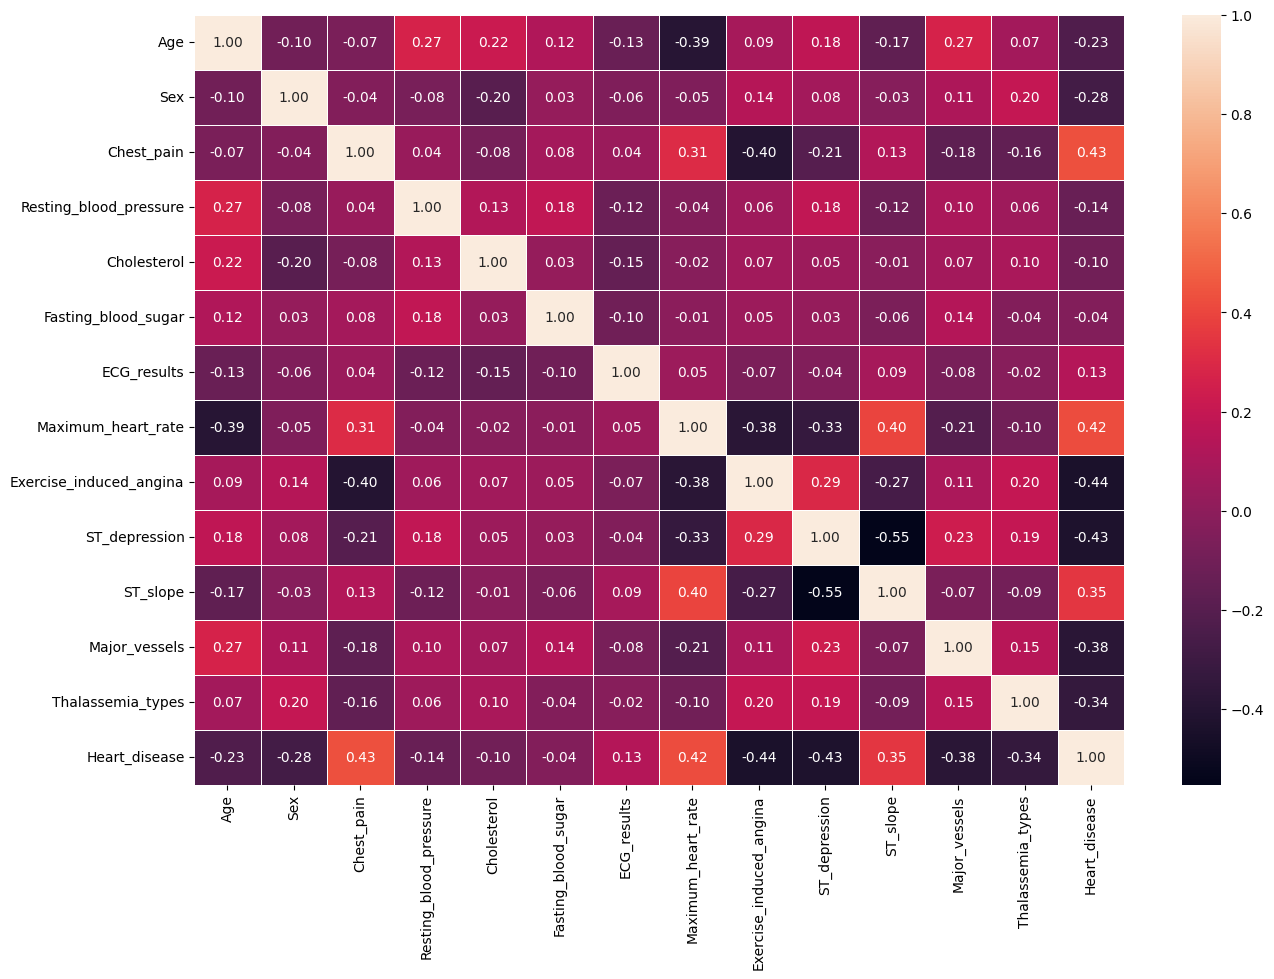

In [14]:
# Let's make our correlation matrix visual
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [15]:
X=df.drop(['Heart_disease'],axis=1)
y=df['Heart_disease']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## 1. Logistic Regression

In [16]:
lr=LogisticRegression()

In [17]:
lr.fit(X_train,y_train)

c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
#Training score

lr.score(X_train,y_train)

0.8670731707317073

In [19]:
#Prediction of the test variable

lr_y_preds=lr.predict(X_test)

In [20]:
#Testing accuracy

lr.score(X_test,y_test)

0.7951219512195122

### Confusion Matrix

In [21]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")


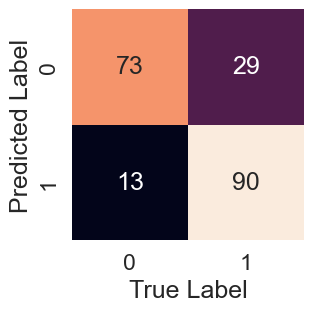

In [22]:
plot_conf_mat(y_test,lr_y_preds)

### Classification Report

In [23]:
print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



## 2. K-Nearest Neighbour

In [24]:
knn=KNeighborsClassifier()

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
#Training score

knn.score(X_train,y_train)

0.9231707317073171

In [27]:
#Prediction of the test variable

knn_y_preds=knn.predict(X_test)

In [28]:
#Testing accuracy

knn.score(X_test,y_test)

0.7317073170731707

### Confusion Matrix

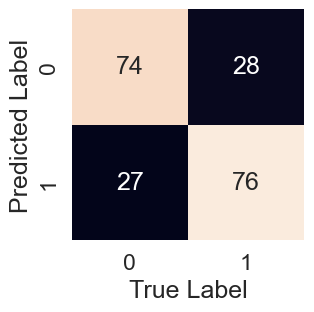

In [29]:
plot_conf_mat(y_test,knn_y_preds)

### Classification Report

In [30]:
print(classification_report(y_test,knn_y_preds))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



## 3. Random Forest

In [31]:
rf=RandomForestClassifier()

In [32]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
#Training score

rf.score(X_train,y_train)

1.0

In [34]:
#Prediction of the test variable

rf_y_preds=rf.predict(X_test)

In [35]:
#Testing accuracy

rf.score(X_test,y_test)

0.9853658536585366

### Confusion Matrix

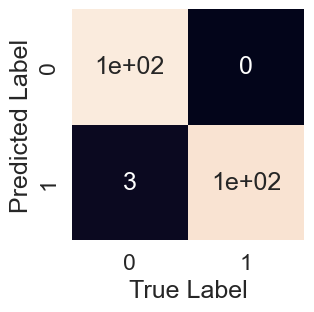

In [36]:
plot_conf_mat(y_test,rf_y_preds)

### Classification Report

In [37]:
print(classification_report(y_test,rf_y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [38]:
svm = SVC()

In [39]:
svm.fit(X_train,y_train)

SVC()

In [40]:
svm.score(X_train,y_train)

0.723170731707317

In [41]:
preds=svm.predict(X_test)
svm.score(X_test,y_test)

0.6829268292682927

In [42]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66       102
           1       0.66      0.76      0.71       103

    accuracy                           0.68       205
   macro avg       0.69      0.68      0.68       205
weighted avg       0.69      0.68      0.68       205



In [42]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN':knn.score(X_test,y_test),
             'Random Forest':rf.score(X_test,y_test),
             'svm':svm.score(X_test,y_test)}

In [43]:
model_scores

{'Logistic Regression': 0.7951219512195122,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366,
 'svm': 0.6829268292682927}

## Model Comparison

In [44]:
#Based on accuracy
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

Logistic Regression       KNN  Random Forest       svm
accuracy             0.795122  0.731707       0.985366  0.682927

In [45]:
from joblib import Parallel, delayed
import joblib
#joblib.dump(lr, 'heart.sav')

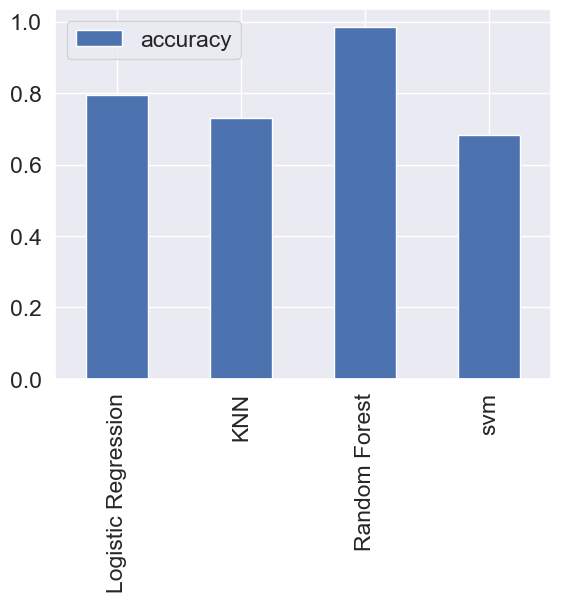

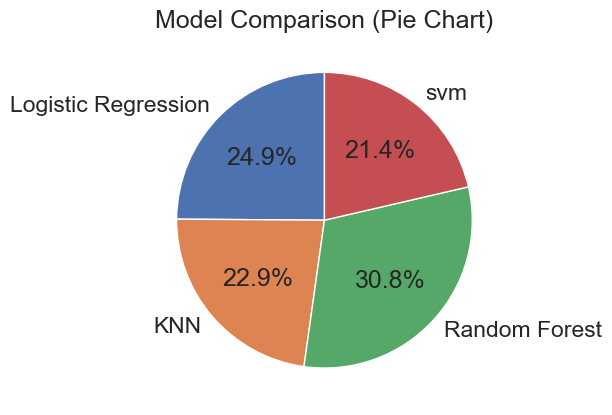

In [46]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

model_compare.T.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, legend=False)
plt.title('Model Comparison (Pie Chart)')
plt.ylabel('')  # To remove the default 'accuracy' label on the y-axis
plt.show()

In [47]:
import pickle

In [48]:
filename = "heart_disease_model.sav"
pickle.dump(df, open(filename, "wb"))


In [49]:
#loading the saved model
loaded_model = pickle.load(open("heart_disease_model.sav", "rb"))